In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import target encoder
from category_encoders import TargetEncoder, WOEEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import nltk
import nltk

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS

# import regular expression
import re

# import ast
import ast

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import KNNimputer
from sklearn.impute import KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

# import GridSearchCV
from sklearn.model_selection import KFold,GridSearchCV

# import statsmodels
import statsmodels.api as sma

# Import Kmeans
from sklearn.cluster import KMeans

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import Catboost Classifier
from catboost import CatBoostClassifier

In [2]:
pd.set_option('display.max_columns', 40)

xtrain = pd.read_csv('xtrain.csv')
xtest = pd.read_csv('xtest.csv')
ytrain = pd.read_csv('ytrain.csv')
ytest = pd.read_csv('ytest.csv')

# xtrain.drop(columns = 'Unnamed: 0',inplace = True)
# xtest.drop(columns = 'Unnamed: 0',inplace = True)
# ytrain.drop(columns = 'Unnamed: 0',inplace = True)
# ytest.drop(columns = 'Unnamed: 0',inplace = True)

In [3]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data 

performance_df = pd.DataFrame(columns = ['Model_Name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','Precision_Score','Recall_Score','AUC_Score','Remarks'])

def model_performance(model, name, xtrain = xtrain , xtest = xtest):
    global performance_df
    
    # predicting train and test data
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob = model.predict_proba(xtest)[:,1]
    
    # calculating metrics for both train and test data
    
    acc_train = round(accuracy_score(ytrain,pred_train),2)*100
    acc_test = round(accuracy_score(ytest,pred_test),2)*100
    f1_train = round(f1_score(ytrain,pred_train),2)
    f1_test = round(f1_score(ytest,pred_test),2)
    precision = round(precision_score(ytest,pred_test),2)
    recall = round(recall_score(ytest,pred_test),2)
    auc_score = round(roc_auc_score(ytest,pred_prob),4)

    # defining function for remarks
    
    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 3 or train_acc > 95:
            return 'Over Fit'
        elif train_acc < 65 or test_acc < 65:
            return 'Under Fit'
        else:
            return 'Good Fit'

    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_Name':name,'Train_Accuracy':acc_train,'Train_F1score':f1_train,
                                           'Test_Accuracy':acc_test,'Test_F1score':f1_test,
                                            'Precision_Score':precision , 'Recall_Score':recall,
                                           'AUC_Score':auc_score,
                                            'Remarks':'Base' if name == 'Base Model' else remark(acc_train,acc_test)}
                                           ,ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))

    print('Train Report :\n',classification_report(ytrain,pred_train))
    print('Test Report :\n',classification_report(ytest,pred_test))

In [4]:
# Craeting a user defined function to highlight the rows 

def highlight_row(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['backkground-white : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

Train Report :
               precision    recall  f1-score   support

           0       0.66      0.69      0.67    114747
           1       0.67      0.64      0.66    114747

    accuracy                           0.66    229494
   macro avg       0.66      0.66      0.66    229494
weighted avg       0.66      0.66      0.66    229494

Test Report :
               precision    recall  f1-score   support

           0       0.65      0.69      0.67     49177
           1       0.67      0.63      0.65     49177

    accuracy                           0.66     98354
   macro avg       0.66      0.66      0.66     98354
weighted avg       0.66      0.66      0.66     98354



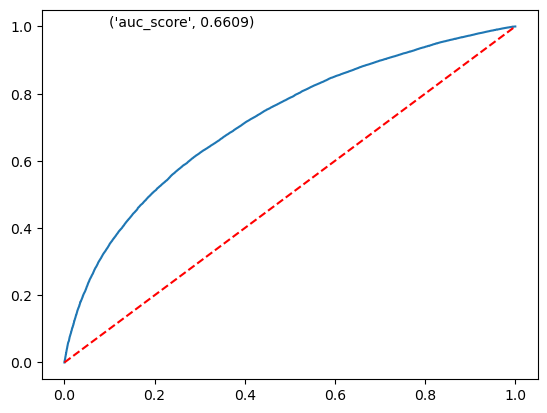

In [5]:
# logistic regression

model_lrs = LogisticRegression().fit(xtrain,ytrain)

model_performance(model_lrs,'Base Model')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114747
           1       1.00      1.00      1.00    114747

    accuracy                           1.00    229494
   macro avg       1.00      1.00      1.00    229494
weighted avg       1.00      1.00      1.00    229494

Test Report :
               precision    recall  f1-score   support

           0       0.69      0.70      0.69     49177
           1       0.69      0.68      0.69     49177

    accuracy                           0.69     98354
   macro avg       0.69      0.69      0.69     98354
weighted avg       0.69      0.69      0.69     98354



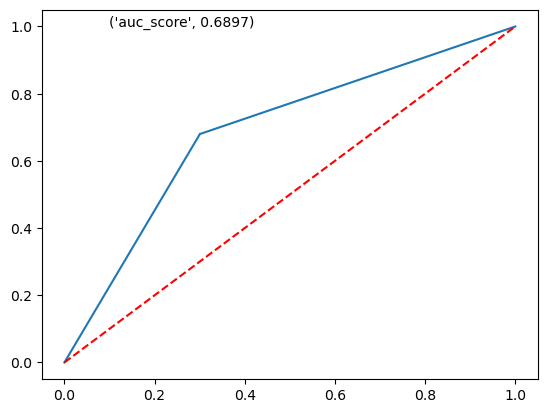

In [6]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt,'DecisionTree Model without tuning')

Train Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114747
           1       1.00      1.00      1.00    114747

    accuracy                           1.00    229494
   macro avg       1.00      1.00      1.00    229494
weighted avg       1.00      1.00      1.00    229494

Test Report :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79     49177
           1       0.81      0.72      0.76     49177

    accuracy                           0.78     98354
   macro avg       0.78      0.78      0.78     98354
weighted avg       0.78      0.78      0.78     98354



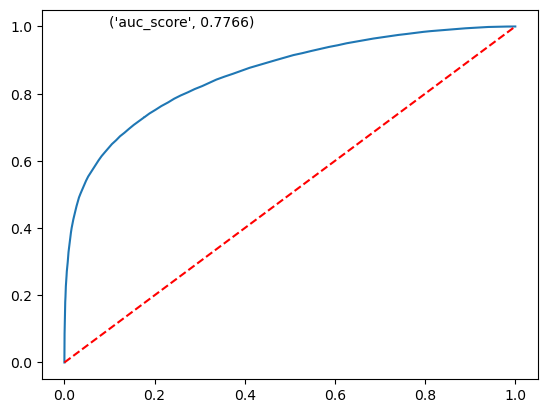

In [7]:
# Random Forest without tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf,'Random Forest without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.70      0.74      0.72    114747
           1       0.73      0.69      0.71    114747

    accuracy                           0.71    229494
   macro avg       0.72      0.71      0.71    229494
weighted avg       0.72      0.71      0.71    229494

Test Report :
               precision    recall  f1-score   support

           0       0.71      0.74      0.72     49177
           1       0.73      0.69      0.71     49177

    accuracy                           0.72     98354
   macro avg       0.72      0.72      0.72     98354
weighted avg       0.72      0.72      0.72     98354



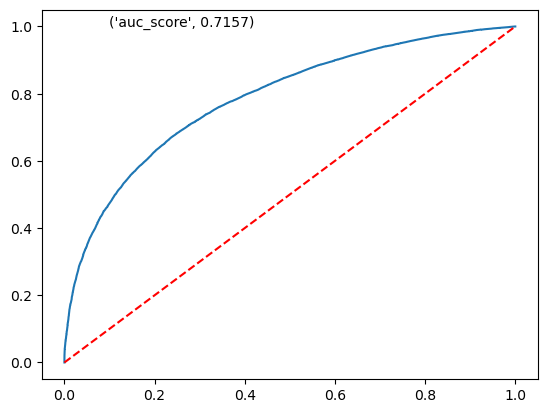

In [8]:
# AdaBoost without tuning

model_ab = AdaBoostClassifier().fit(xtrain,ytrain)

model_performance(model_ab,'AdaBoost without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.73      0.79      0.75    114747
           1       0.77      0.70      0.73    114747

    accuracy                           0.74    229494
   macro avg       0.75      0.74      0.74    229494
weighted avg       0.75      0.74      0.74    229494

Test Report :
               precision    recall  f1-score   support

           0       0.73      0.79      0.76     49177
           1       0.77      0.71      0.74     49177

    accuracy                           0.75     98354
   macro avg       0.75      0.75      0.75     98354
weighted avg       0.75      0.75      0.75     98354



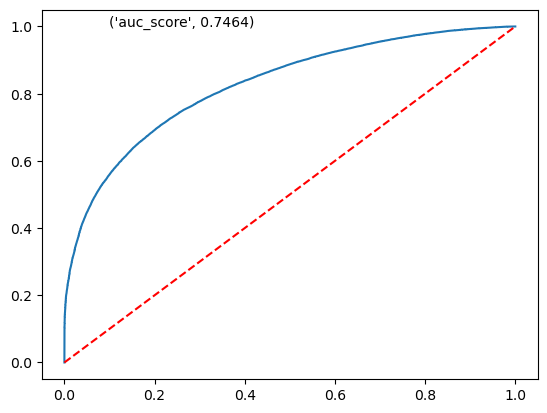

In [9]:
# Gradient Boosting without tuning

model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb,'GradientBoosting without tuning')

Train Report :
               precision    recall  f1-score   support

           0       0.75      0.77      0.76    114747
           1       0.76      0.74      0.75    114747

    accuracy                           0.75    229494
   macro avg       0.75      0.75      0.75    229494
weighted avg       0.75      0.75      0.75    229494

Test Report :
               precision    recall  f1-score   support

           0       0.73      0.76      0.74     49177
           1       0.75      0.72      0.73     49177

    accuracy                           0.74     98354
   macro avg       0.74      0.74      0.74     98354
weighted avg       0.74      0.74      0.74     98354



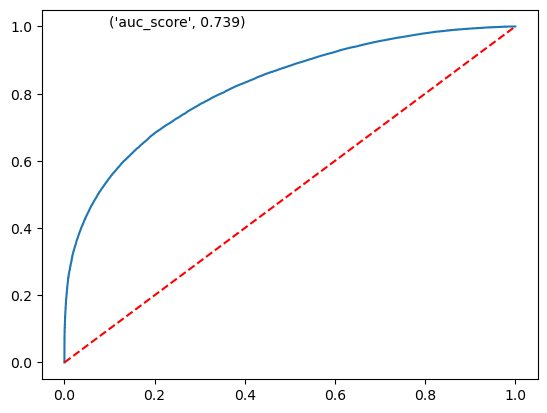

In [10]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier().fit(xtrain,ytrain)

model_performance(model_nn , 'Neural Network')

Train Report :
               precision    recall  f1-score   support

           0       0.76      0.84      0.80    114747
           1       0.82      0.73      0.77    114747

    accuracy                           0.79    229494
   macro avg       0.79      0.79      0.79    229494
weighted avg       0.79      0.79      0.79    229494

Test Report :
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     49177
           1       0.81      0.71      0.76     49177

    accuracy                           0.77     98354
   macro avg       0.77      0.77      0.77     98354
weighted avg       0.77      0.77      0.77     98354



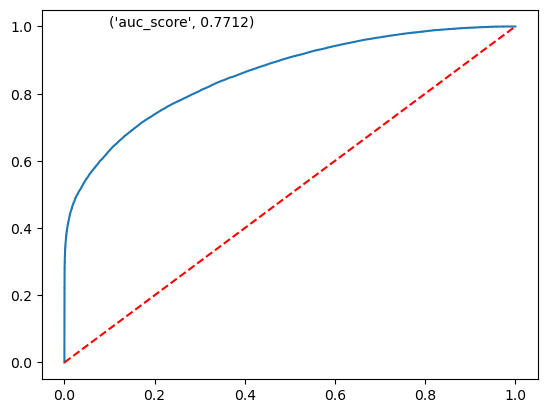

In [11]:
# XGB without tuning

model_xgb = XGBClassifier().fit(xtrain,ytrain)

model_performance(model_xgb,'Xtreme Gradient Boosting without tuning')

Learning rate set to 0.10495
0:	learn: 0.6711363	total: 262ms	remaining: 4m 21s
1:	learn: 0.6534581	total: 316ms	remaining: 2m 37s
2:	learn: 0.6391070	total: 367ms	remaining: 2m 2s
3:	learn: 0.6272722	total: 414ms	remaining: 1m 43s
4:	learn: 0.6173311	total: 469ms	remaining: 1m 33s
5:	learn: 0.6094159	total: 525ms	remaining: 1m 27s
6:	learn: 0.6025543	total: 580ms	remaining: 1m 22s
7:	learn: 0.5945876	total: 633ms	remaining: 1m 18s
8:	learn: 0.5872053	total: 687ms	remaining: 1m 15s
9:	learn: 0.5799279	total: 741ms	remaining: 1m 13s
10:	learn: 0.5764627	total: 794ms	remaining: 1m 11s
11:	learn: 0.5709717	total: 852ms	remaining: 1m 10s
12:	learn: 0.5672991	total: 915ms	remaining: 1m 9s
13:	learn: 0.5630559	total: 969ms	remaining: 1m 8s
14:	learn: 0.5597751	total: 1.02s	remaining: 1m 7s
15:	learn: 0.5553205	total: 1.07s	remaining: 1m 6s
16:	learn: 0.5531131	total: 1.13s	remaining: 1m 5s
17:	learn: 0.5505073	total: 1.18s	remaining: 1m 4s
18:	learn: 0.5488530	total: 1.23s	remaining: 1m 3s
1

161:	learn: 0.4688048	total: 8.79s	remaining: 45.5s
162:	learn: 0.4687430	total: 8.84s	remaining: 45.4s
163:	learn: 0.4686346	total: 8.89s	remaining: 45.3s
164:	learn: 0.4685062	total: 8.94s	remaining: 45.2s
165:	learn: 0.4683803	total: 8.99s	remaining: 45.2s
166:	learn: 0.4683120	total: 9.05s	remaining: 45.1s
167:	learn: 0.4682158	total: 9.1s	remaining: 45.1s
168:	learn: 0.4680884	total: 9.15s	remaining: 45s
169:	learn: 0.4676054	total: 9.2s	remaining: 44.9s
170:	learn: 0.4674775	total: 9.26s	remaining: 44.9s
171:	learn: 0.4673771	total: 9.31s	remaining: 44.8s
172:	learn: 0.4672692	total: 9.36s	remaining: 44.7s
173:	learn: 0.4672031	total: 9.41s	remaining: 44.7s
174:	learn: 0.4671339	total: 9.47s	remaining: 44.7s
175:	learn: 0.4669034	total: 9.52s	remaining: 44.6s
176:	learn: 0.4668088	total: 9.57s	remaining: 44.5s
177:	learn: 0.4665531	total: 9.63s	remaining: 44.5s
178:	learn: 0.4663846	total: 9.68s	remaining: 44.4s
179:	learn: 0.4662598	total: 9.73s	remaining: 44.3s
180:	learn: 0.46

323:	learn: 0.4498529	total: 18s	remaining: 37.7s
324:	learn: 0.4497725	total: 18.1s	remaining: 37.6s
325:	learn: 0.4497169	total: 18.2s	remaining: 37.6s
326:	learn: 0.4496270	total: 18.3s	remaining: 37.6s
327:	learn: 0.4495314	total: 18.3s	remaining: 37.6s
328:	learn: 0.4494421	total: 18.4s	remaining: 37.5s
329:	learn: 0.4493165	total: 18.5s	remaining: 37.5s
330:	learn: 0.4492911	total: 18.5s	remaining: 37.4s
331:	learn: 0.4492186	total: 18.6s	remaining: 37.4s
332:	learn: 0.4491452	total: 18.6s	remaining: 37.3s
333:	learn: 0.4490871	total: 18.7s	remaining: 37.3s
334:	learn: 0.4490659	total: 18.8s	remaining: 37.2s
335:	learn: 0.4489881	total: 18.8s	remaining: 37.2s
336:	learn: 0.4489249	total: 18.9s	remaining: 37.1s
337:	learn: 0.4488593	total: 18.9s	remaining: 37.1s
338:	learn: 0.4487877	total: 19s	remaining: 37s
339:	learn: 0.4487503	total: 19s	remaining: 36.9s
340:	learn: 0.4486895	total: 19.1s	remaining: 36.9s
341:	learn: 0.4485002	total: 19.1s	remaining: 36.8s
342:	learn: 0.448436

482:	learn: 0.4392508	total: 26.5s	remaining: 28.3s
483:	learn: 0.4391926	total: 26.5s	remaining: 28.3s
484:	learn: 0.4391118	total: 26.6s	remaining: 28.2s
485:	learn: 0.4390423	total: 26.6s	remaining: 28.2s
486:	learn: 0.4389604	total: 26.7s	remaining: 28.1s
487:	learn: 0.4389023	total: 26.7s	remaining: 28.1s
488:	learn: 0.4388111	total: 26.8s	remaining: 28s
489:	learn: 0.4387408	total: 26.9s	remaining: 28s
490:	learn: 0.4387076	total: 26.9s	remaining: 27.9s
491:	learn: 0.4386636	total: 27s	remaining: 27.9s
492:	learn: 0.4386349	total: 27.1s	remaining: 27.8s
493:	learn: 0.4385499	total: 27.1s	remaining: 27.8s
494:	learn: 0.4385116	total: 27.2s	remaining: 27.8s
495:	learn: 0.4384671	total: 27.3s	remaining: 27.7s
496:	learn: 0.4384179	total: 27.3s	remaining: 27.7s
497:	learn: 0.4383643	total: 27.4s	remaining: 27.6s
498:	learn: 0.4383140	total: 27.5s	remaining: 27.6s
499:	learn: 0.4382628	total: 27.5s	remaining: 27.5s
500:	learn: 0.4382095	total: 27.6s	remaining: 27.5s
501:	learn: 0.4381

641:	learn: 0.4311982	total: 35.6s	remaining: 19.8s
642:	learn: 0.4311486	total: 35.6s	remaining: 19.8s
643:	learn: 0.4311034	total: 35.7s	remaining: 19.7s
644:	learn: 0.4310536	total: 35.7s	remaining: 19.7s
645:	learn: 0.4310064	total: 35.8s	remaining: 19.6s
646:	learn: 0.4309691	total: 35.8s	remaining: 19.5s
647:	learn: 0.4309220	total: 35.9s	remaining: 19.5s
648:	learn: 0.4308917	total: 35.9s	remaining: 19.4s
649:	learn: 0.4308470	total: 36s	remaining: 19.4s
650:	learn: 0.4308067	total: 36s	remaining: 19.3s
651:	learn: 0.4307743	total: 36.1s	remaining: 19.2s
652:	learn: 0.4307179	total: 36.1s	remaining: 19.2s
653:	learn: 0.4306589	total: 36.2s	remaining: 19.1s
654:	learn: 0.4305980	total: 36.2s	remaining: 19.1s
655:	learn: 0.4305583	total: 36.2s	remaining: 19s
656:	learn: 0.4305222	total: 36.3s	remaining: 18.9s
657:	learn: 0.4304499	total: 36.3s	remaining: 18.9s
658:	learn: 0.4303842	total: 36.4s	remaining: 18.8s
659:	learn: 0.4303382	total: 36.4s	remaining: 18.8s
660:	learn: 0.4303

800:	learn: 0.4241381	total: 44.8s	remaining: 11.1s
801:	learn: 0.4240896	total: 44.9s	remaining: 11.1s
802:	learn: 0.4240613	total: 45s	remaining: 11s
803:	learn: 0.4240137	total: 45s	remaining: 11s
804:	learn: 0.4239838	total: 45.1s	remaining: 10.9s
805:	learn: 0.4239510	total: 45.2s	remaining: 10.9s
806:	learn: 0.4239114	total: 45.3s	remaining: 10.8s
807:	learn: 0.4238846	total: 45.3s	remaining: 10.8s
808:	learn: 0.4238353	total: 45.4s	remaining: 10.7s
809:	learn: 0.4238053	total: 45.4s	remaining: 10.7s
810:	learn: 0.4237667	total: 45.5s	remaining: 10.6s
811:	learn: 0.4237423	total: 45.5s	remaining: 10.5s
812:	learn: 0.4237073	total: 45.6s	remaining: 10.5s
813:	learn: 0.4236842	total: 45.6s	remaining: 10.4s
814:	learn: 0.4236521	total: 45.7s	remaining: 10.4s
815:	learn: 0.4236036	total: 45.8s	remaining: 10.3s
816:	learn: 0.4235580	total: 45.8s	remaining: 10.3s
817:	learn: 0.4235277	total: 45.9s	remaining: 10.2s
818:	learn: 0.4235054	total: 45.9s	remaining: 10.1s
819:	learn: 0.423470

963:	learn: 0.4176591	total: 53.2s	remaining: 1.99s
964:	learn: 0.4176416	total: 53.3s	remaining: 1.93s
965:	learn: 0.4176087	total: 53.3s	remaining: 1.88s
966:	learn: 0.4175756	total: 53.4s	remaining: 1.82s
967:	learn: 0.4175257	total: 53.4s	remaining: 1.76s
968:	learn: 0.4174760	total: 53.5s	remaining: 1.71s
969:	learn: 0.4174419	total: 53.5s	remaining: 1.65s
970:	learn: 0.4174034	total: 53.6s	remaining: 1.6s
971:	learn: 0.4173565	total: 53.6s	remaining: 1.54s
972:	learn: 0.4173343	total: 53.6s	remaining: 1.49s
973:	learn: 0.4173094	total: 53.7s	remaining: 1.43s
974:	learn: 0.4172840	total: 53.7s	remaining: 1.38s
975:	learn: 0.4172412	total: 53.8s	remaining: 1.32s
976:	learn: 0.4172063	total: 53.8s	remaining: 1.27s
977:	learn: 0.4171769	total: 53.9s	remaining: 1.21s
978:	learn: 0.4171398	total: 53.9s	remaining: 1.16s
979:	learn: 0.4170980	total: 54s	remaining: 1.1s
980:	learn: 0.4170650	total: 54s	remaining: 1.05s
981:	learn: 0.4170229	total: 54.1s	remaining: 991ms
982:	learn: 0.4169

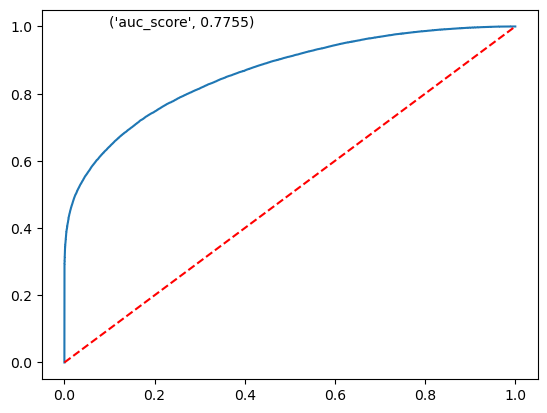

In [12]:
model_catboost = CatBoostClassifier().fit(xtrain,ytrain)

model_performance(model_catboost , 'Catboost')

In [13]:
performance_df.style.apply(highlight_row,axis=1)

,Model_Name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,Precision_Score,Recall_Score,AUC_Score,Remarks
0,Base Model,66.000000,0.660000,66.000000,0.650000,0.670000,0.630000,0.719700,Base
1,DecisionTree Model without tuning,100.000000,1.000000,69.000000,0.690000,0.690000,0.680000,0.689700,Over Fit
2,Random Forest without tuning,100.000000,1.000000,78.000000,0.760000,0.810000,0.720000,0.858700,Over Fit
3,AdaBoost without tuning,71.000000,0.710000,72.000000,0.710000,0.730000,0.690000,0.786500,Good Fit
4,GradientBoosting without tuning,74.000000,0.730000,75.000000,0.740000,0.770000,0.710000,0.825900,Good Fit
5,Neural Network,75.000000,0.750000,74.000000,0.730000,0.750000,0.720000,0.822300,Good Fit
6,Xtreme Gradient Boosting without tuning,79.000000,0.770000,77.000000,0.760000,0.810000,0.710000,0.857100,Good Fit
7,Catboost,80.000000,0.790000,78.000000,0.760000,0.810000,0.720000,0.861800,Good Fit


After assessing various models, it was observed that some models exhibited a significant drop in performance when applied to unseen data, indicating overfitting. However, there were models that consistently performed well on both training and unseen data. Notably, the Catboost model outperformed other models in terms of performance(78%). Hence, based on its superior performance and generalization ability, we can confidently consider the Catboost model as our final choice.

In [ ]:
# Freeze the model

import pickle

model = open("model_catboost.pickle", "wb")
pickle.dump(model_catboost, model)
model.close()